In [2]:
!pip install tflearn

     |████████████████████████████████| 107 kB 7.9 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=bb481a3f2e58ded269c39614000698221832817de38d245b751962165d7fa568
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [3]:
import tflearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

from tensorflow import keras

Instructions for updating:
non-resource variables are not supported in the long term


#Import and understand the data

In [4]:
X, y = tflearn.datasets.oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [5]:
print('Length of the features:', len(X))
print('Length of the labels:', len(y))
print('Shape of the image:', X[0].shape)

Length of the features: 1360
Length of the labels: 1360
Shape of the image: (224, 224, 3)


In [6]:
unique, counts = np.unique(y, return_counts=True)

In [7]:
dict(zip(unique, counts))

{0: 80,
 1: 80,
 2: 80,
 3: 80,
 4: 80,
 5: 80,
 6: 80,
 7: 80,
 8: 80,
 9: 80,
 10: 80,
 11: 80,
 12: 80,
 13: 80,
 14: 80,
 15: 80,
 16: 80}

#Image exploration and transformation

In [8]:
def random_images(n):
  plt.figure(figsize=(n * 2, 2))
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(X[i])
    plt.axis('off')
  plt.show()

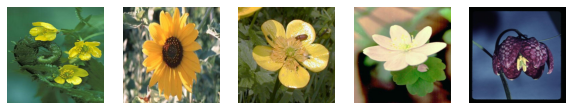

In [9]:
random_images(5)

In [10]:
image_0 = X[0]

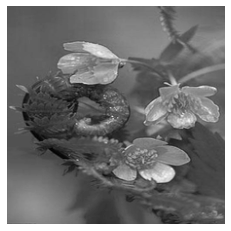

In [11]:
gray_image = cv2.cvtColor(image_0, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray_image, cmap='gray')

In [12]:
sharpen_kernal = np.array([[-1, -1, -1], [-1, 25, -1], [-1, -1, -1]])

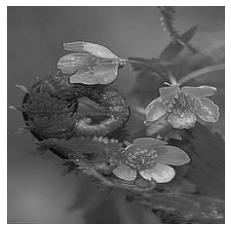

In [13]:
sharpened_image = cv2.filter2D(gray_image, -1, sharpen_kernal)
plt.axis('off')
plt.imshow(sharpened_image, cmap='gray')

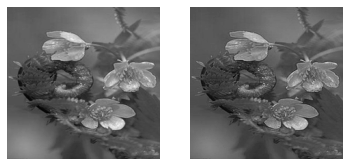

In [14]:
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.show()

In [15]:
blur_kernal = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

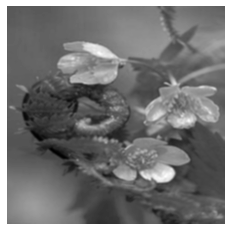

In [16]:
blurred_image = cv2.filter2D(gray_image, -1, blur_kernal)
plt.axis('off')
plt.imshow(blurred_image, cmap='gray')

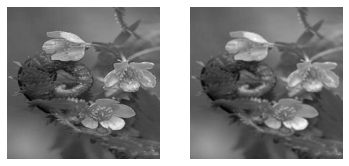

In [17]:
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()

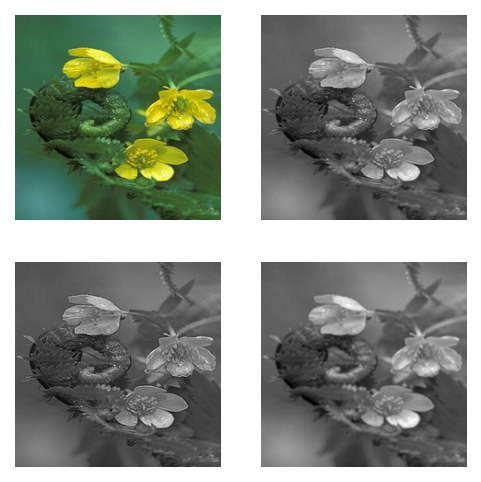

In [18]:
plt.figure(dpi=150)
plt.subplot(2, 3, 1)
plt.imshow(image_0, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()

#Model training and tuning

In [19]:
y_categorical = keras.utils.to_categorical(y)

In [20]:
size = 32
X_reshaped = np.zeros((X.shape[0], size, size, 3))

for i,j in enumerate(X):
    X_reshaped[i] = np.resize(j,(size, size,3))

In [21]:
X_reshaped.shape

(1360, 32, 32, 3)

In [22]:
y_categorical.shape

(1360, 17)

In [23]:
X_reshaped = X_reshaped / 255

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

In [25]:
y_train.shape

(1088, 17)

In [29]:
X_reshaped.shape

(1360, 32, 32, 3)

In [52]:
X_reshaped_1D = X_reshaped.reshape(X_reshaped.shape[0], 3072, 1)

In [53]:
X_train_1D, X_test_1D, y_train_1D, y_test_1D = train_test_split(X_reshaped_1D, y_categorical, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

In [40]:
model_ann = keras.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(1024, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(y_categorical.shape[1], activation="softmax")
])

Instructions for updating:
Colocations handled automatically by placer.


In [41]:
model_ann.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [42]:
model_ann.build()

In [43]:
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              3146752   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)              

In [46]:
batch_size = 32
epochs = 10

model_ann.fit(
  X_train, y_train, 
  batch_size=batch_size, 
  epochs=epochs,
  validation_data=(X_test, y_test),
)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.7394 - acc: 0.8070 - val_loss: 6.2521 - val_acc: 0.1103
Epoch 2/10
1088/1088 [==============================] - 1s 1ms/sample - loss: 0.7197 - acc: 0.8051 - val_loss: 4.9296 - val_acc: 0.1544
Epoch 3/10
1088/1088 [==============================] - 1s 1ms/sample - loss: 0.6574 - acc: 0.8254 - val_loss: 5.3309 - val_acc: 0.1434
Epoch 4/10
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.6788 - acc: 0.8024 - val_loss: 5.6836 - val_acc: 0.1397
Epoch 5/10
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.6545 - acc: 0.8199 - val_loss: 5.7395 - val_acc: 0.1250
Epoch 6/10
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.6178 - acc: 0.8447 - val_loss: 4.9022 - val_acc: 0.1618
Epoch 7/10
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.5829 - acc: 0.8447 - val_loss: 5.1373 - val_acc: 0.1324
E

In [47]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=[size, size, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(17, activation='softmax')
])

In [48]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [49]:
model.build()

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)        

In [51]:
batch_size = 32
epochs = 10

model.fit(
  X_train, y_train, 
  batch_size=batch_size, 
  epochs=epochs,
  validation_data=(X_test, y_test),
)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - ETA: 0s - loss: 2.8345 - acc: 0.0478

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 21s 20ms/sample - loss: 2.8345 - acc: 0.0478 - val_loss: 2.8338 - val_acc: 0.0404
Epoch 2/10
1088/1088 [==============================] - 19s 18ms/sample - loss: 2.8334 - acc: 0.0634 - val_loss: 2.8342 - val_acc: 0.0404
Epoch 3/10
1088/1088 [==============================] - 20s 19ms/sample - loss: 2.8334 - acc: 0.0634 - val_loss: 2.8347 - val_acc: 0.0404
Epoch 4/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 2.8332 - acc: 0.0634 - val_loss: 2.8349 - val_acc: 0.0404
Epoch 5/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 2.8332 - acc: 0.0634 - val_loss: 2.8352 - val_acc: 0.0404
Epoch 6/10
1088/1088 [==============================] - 18s 17ms/sample - loss: 2.8332 - acc: 0.0634 - val_loss: 2.8356 - val_acc: 0.0404
Epoch 7/10
1088/1088 [==============================] - 18s 16ms/sample - loss: 2.8332 - acc: 0.0561 - val_loss: 2.8356 - val_acc: 0.0404
Epoch 8/10
1088/1088 [=======================